# <font size="7"><strong><em>Statistical theory final project</em></strong></font>

<font size="6">Birth rate around the world</font>

<font size="4">Omer Darzi <br> Tomer Adar</font>

<font size="6"><strong><em>Contents</em></strong></font>

<a href="#prep">Preparations</a>
<br>
<a href="#gett">Getting familiar with the data</a>
<br>
<a href="#corr">Pearson correlations</a>
<br>
<a href="#reg">Linear regression</a>
<br>
<a href="#multi_reg">Multilinear regression</a>
<br>
<a href="#multi_reg_new_feature">Multilinear regression with a categorical variable: continents</a>

<font size="6"><strong><em>Introduction</em></strong></font>
<br><br>
This is the python code for our project in the course "statistical theory".<br>
Our research question is "How do economical, medical and environmental factors affect the birth rate in various countries?".<br>
The project goal is to try to answer this question, using statistical tools that we learned in the course.

<font size="6"><strong><em><a id="prep">Preparations</a></em></strong></font>

<font size="4"><b>Some necessary imports</b></font>

In [1111]:
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

<font size="4"><b>Reading our data from excel file</b></font>

2023 data

In [1112]:
#birth rate
birth_rate_df=pd.read_excel("Data.xlsx", usecols="B")
birth_rate_matrix=birth_rate_df.to_numpy()
birth_rate_arr = np.squeeze(np.asarray(birth_rate_matrix))

#life expectancy
life_exp_df=pd.read_excel("Data.xlsx", usecols="C")
life_exp_matrix=life_exp_df.to_numpy()
life_exp_arr = np.squeeze(np.asarray(life_exp_matrix))
# clear nan values from array
life_exp_arr_clean=life_exp_arr[np.logical_not(np.isnan(life_exp_arr))]


#healthy life expectancy
healthy_life_exp_df=pd.read_excel("Data.xlsx", usecols="D")
healthy_life_exp_matrix=healthy_life_exp_df.to_numpy()
healthy_life_exp_arr = np.squeeze(np.asarray(healthy_life_exp_matrix))
# clear nan values from array
healthy_life_exp_arr_clean=healthy_life_exp_arr[np.logical_not(np.isnan(healthy_life_exp_arr))]


#GDP
gdp_df=pd.read_excel("Data.xlsx", usecols="E")
gdp_matrix=gdp_df.to_numpy()
gdp_arr = np.squeeze(np.asarray(gdp_matrix))


#Minimum wage
minimum_wage_df=pd.read_excel("Data.xlsx", usecols="F")
minimum_wage_matrix=minimum_wage_df.to_numpy()
minimum_wage_arr = np.squeeze(np.asarray(minimum_wage_matrix))
# clear nan values from array
minimum_wage_arr_clean=minimum_wage_arr[np.logical_not(np.isnan(minimum_wage_arr))]


#CO2
co2_df=pd.read_excel("Data.xlsx", usecols="G")
co2_matrix=co2_df.to_numpy()
co2_arr = np.squeeze(np.asarray(co2_matrix))
# clear nan values from array
co2_arr_clean=co2_arr[np.logical_not(np.isnan(co2_arr))]


#Forested area
forest_df=pd.read_excel("Data.xlsx", usecols="H")
forest_matrix=forest_df.to_numpy()
forest_arr = np.squeeze(np.asarray(forest_matrix))
# clear nan values from array
forest_arr_clean=forest_arr[np.logical_not(np.isnan(forest_arr))]


#fertility rate
fertility_rate_df=pd.read_excel("Data.xlsx", usecols="I")
fertility_rate_matrix=fertility_rate_df.to_numpy()
fertility_rate_arr = np.squeeze(np.asarray(fertility_rate_matrix))

2024 data

In [1113]:
#birth rate
birth_rate_2024_df=pd.read_excel("Data_2024.xlsx", usecols="C")
birth_rate_2024_matrix=birth_rate_2024_df.to_numpy()
birth_rate_2024_arr = np.squeeze(np.asarray(birth_rate_2024_matrix))

#life expectancy
life_exp_2024_df=pd.read_excel("Data_2024.xlsx", usecols="B")
life_exp_2024_matrix=life_exp_2024_df.to_numpy()
life_exp_2024_arr = np.squeeze(np.asarray(life_exp_2024_matrix))

#minimum wage
minimum_wage_2024_df=pd.read_excel("Data_2024.xlsx", usecols="D")
minimum_wage_2024_matrix=minimum_wage_2024_df.to_numpy()
minimum_wage_2024_arr = np.squeeze(np.asarray(minimum_wage_2024_matrix))
# clear nan values from array
minimum_wage_2024_arr_clean=minimum_wage_2024_arr[np.logical_not(np.isnan(minimum_wage_2024_arr))]

<font size="6"><strong><em><a id="gett">Getting familiar with the data</a></em></strong></font>

<font size="5"><b>2023 data:</b></font>

<font size="4"><b>Performing Kolmogorov-Smirnov test to check normality</b></font>

In [1114]:
def check_normality(data, num_comp, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.
    num_comp: The number of comparisons made. Needed for Bonferroni correction.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """
    
    n = len(data)
    
    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    
    print("p value:%.4f" % p_value)
    if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed") 

In [1115]:
num_comp = 8 # the number of comparisons we make

print("Birth Rate:")
check_normality(birth_rate_arr,num_comp)

print("\nLife expectancy:")
check_normality(life_exp_arr_clean,num_comp)

print("\nHealthy Life expectancy:")
check_normality(healthy_life_exp_arr_clean,num_comp)

print("\nGDP:")
check_normality(gdp_arr,num_comp)

print("\nminimum wage:")
check_normality(minimum_wage_arr_clean,num_comp)

print("\nCO2 emissions:")
check_normality(co2_arr_clean,num_comp)

print("\nForested area:")
check_normality(forest_arr_clean,num_comp)

print("\nFertility Rate:")
check_normality(fertility_rate_arr,num_comp)

Birth Rate:
p value:0.0063
Fail to reject null hypothesis >> The data is normally distributed

Life expectancy:
p value:0.2749
Fail to reject null hypothesis >> The data is normally distributed

Healthy Life expectancy:
p value:0.1133
Fail to reject null hypothesis >> The data is normally distributed

GDP:
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

minimum wage:
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

CO2 emissions:
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Forested area:
p value:0.0714
Fail to reject null hypothesis >> The data is normally distributed

Fertility Rate:
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


<font size="4"><b>Displaying histograms of the distributions</b></font>

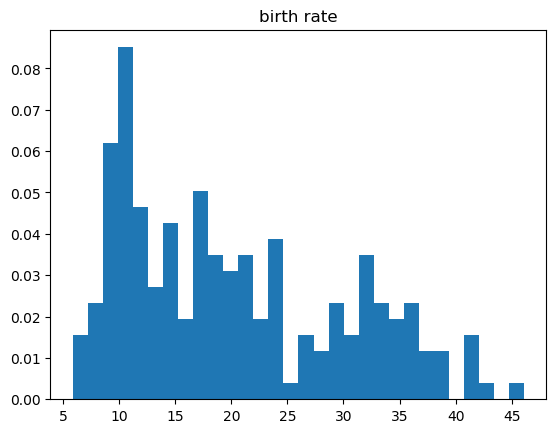

In [1116]:
count, bins, ignored = plt.hist(birth_rate_arr, 30, density=True)
plt.title("birth rate")
plt.show()

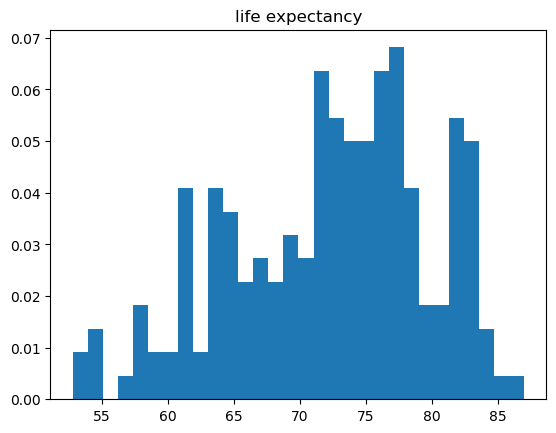

In [1117]:
count, bins, ignored = plt.hist(life_exp_arr_clean, 30, density=True)
plt.title("life expectancy")
plt.show()

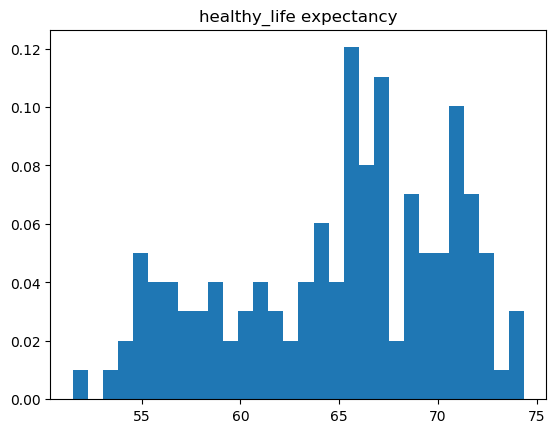

In [1118]:
count, bins, ignored = plt.hist(healthy_life_exp_arr_clean, 30, density=True)
plt.title("healthy_life expectancy")
plt.show()

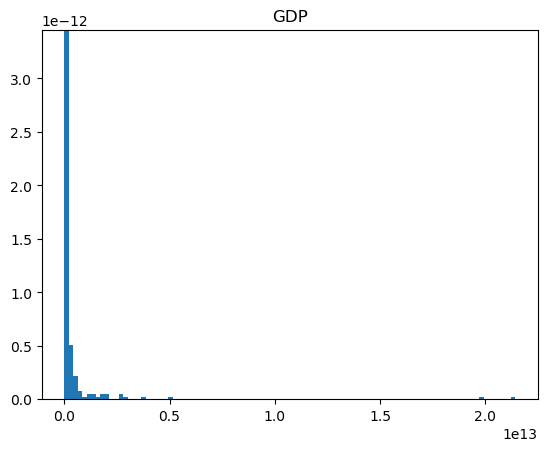

In [1119]:
count, bins, ignored = plt.hist(gdp_arr, 100, density=True)
plt.title("GDP")
plt.show()

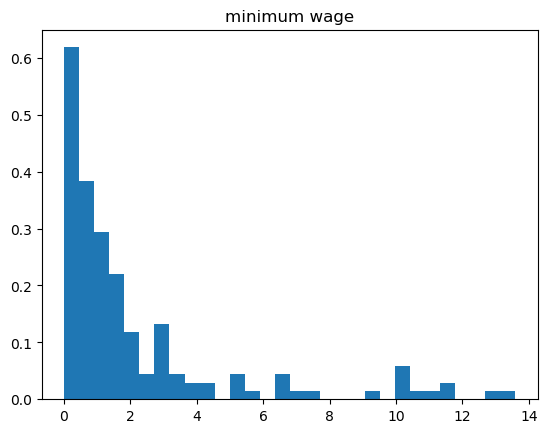

In [1120]:
count, bins, ignored = plt.hist(minimum_wage_arr_clean, 30, density=True)
plt.title("minimum wage")
plt.show()

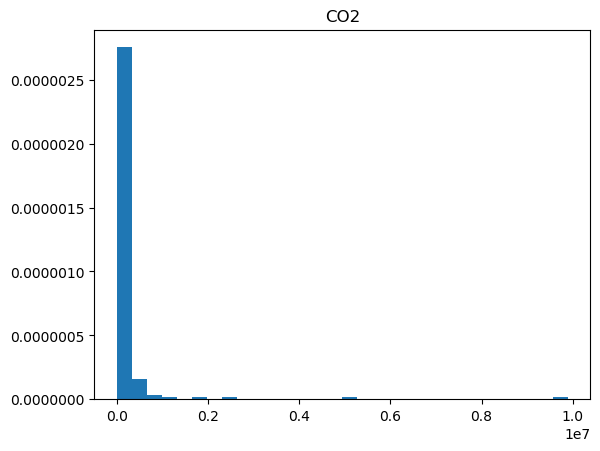

In [1121]:
count, bins, ignored = plt.hist(co2_arr_clean, 30, density=True)
plt.title("CO2")
plt.show()

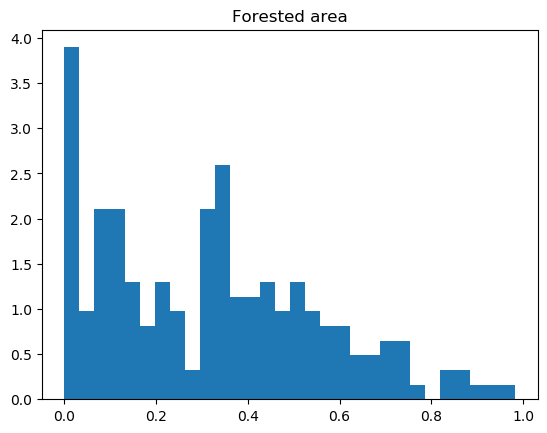

In [1122]:
count, bins, ignored = plt.hist(forest_arr_clean, 30, density=True)
plt.title("Forested area")
plt.show()

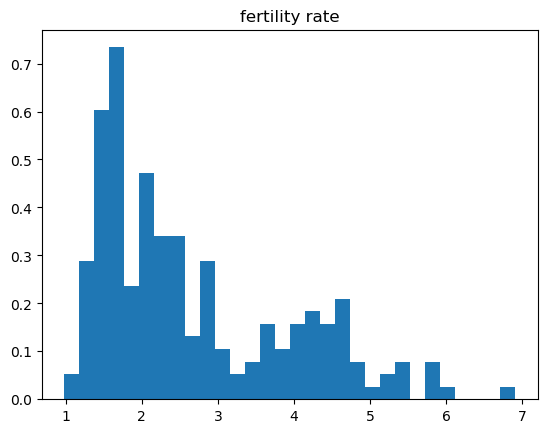

In [1123]:
count, bins, ignored = plt.hist(fertility_rate_arr, 30, density=True)
plt.title("fertility rate")
plt.show()

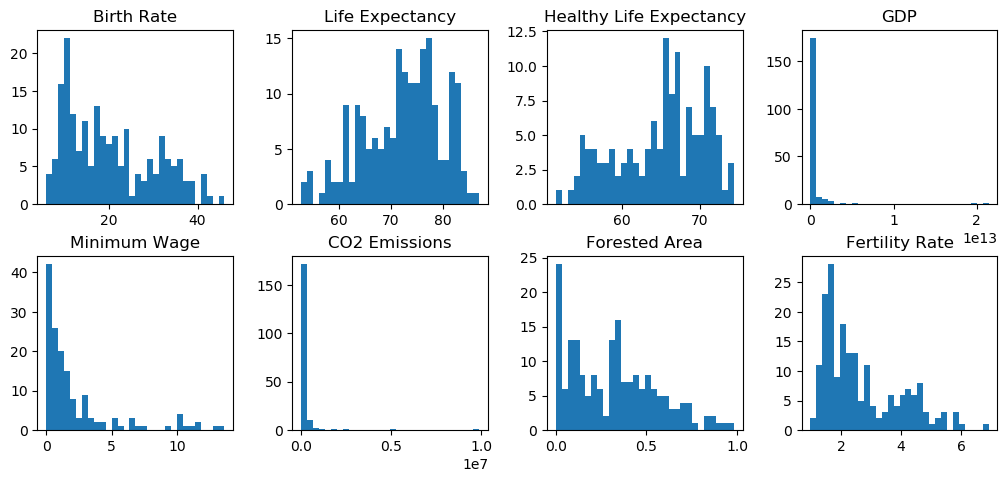

In [1124]:
# Sample data
data = np.array([[birth_rate_arr, life_exp_arr_clean, healthy_life_exp_arr_clean, gdp_arr],
                [minimum_wage_arr_clean,co2_arr_clean,forest_arr_clean,fertility_rate_arr]])

# Set the containers for the plots
nrows = 2
ncols = 4
fit , ax = plt.subplots(nrows, ncols)
fit.set_figheight(5)
fit.set_figwidth(12)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

# Plot histogram
[ax[i, j].hist(data[i][j], bins=30) for i in range(nrows) for j in range(ncols)]
ax[0,0].set_title('Birth Rate')
ax[0,1].set_title('Life Expectancy')
ax[0,2].set_title('Healthy Life Expectancy')
ax[0,3].set_title('GDP')
ax[1,0].set_title('Minimum Wage')
ax[1,1].set_title('CO2 Emissions')
ax[1,2].set_title('Forested Area')
ax[1,3].set_title('Fertility Rate')


plt.show()  # Show the histogram


<font size="4"><b>Calculating various statistics</b></font>

In [1125]:
from tabulate import tabulate

print('Statistics of 2023 data')

br=['Birth rate', np.mean(birth_rate_arr), np.var(birth_rate_arr), np.median(birth_rate_arr), np.amin(birth_rate_arr), np.amax(birth_rate_arr)]
le=['Life expectancy', np.mean(life_exp_arr_clean), np.var(life_exp_arr_clean), np.median(life_exp_arr_clean), np.amin(life_exp_arr_clean), np.amax(life_exp_arr_clean)]
hle=['Healthy life expectancy', np.mean(healthy_life_exp_arr_clean), np.var(healthy_life_exp_arr_clean), np.median(healthy_life_exp_arr_clean), np.amin(healthy_life_exp_arr_clean), np.amax(healthy_life_exp_arr_clean)]
gdp=['GDP', np.mean(gdp_arr), np.var(gdp_arr), np.median(gdp_arr), np.amin(gdp_arr), np.amax(gdp_arr)]
mw=['Minimum wage', np.mean(minimum_wage_arr_clean), np.var(minimum_wage_arr_clean), np.median(minimum_wage_arr_clean), np.amin(minimum_wage_arr_clean), np.amax(minimum_wage_arr_clean)]
co2=['CO2 emissions', np.mean(co2_arr_clean), np.var(co2_arr_clean), np.median(co2_arr_clean), np.amin(co2_arr_clean), np.amax(co2_arr_clean)]
fe=['Forested area', np.mean(forest_arr_clean), np.var(forest_arr_clean), np.median(forest_arr_clean), np.amin(forest_arr_clean), np.amax(forest_arr_clean)]
fr=['Fertility rate', np.mean(fertility_rate_arr), np.var(fertility_rate_arr), np.median(fertility_rate_arr), np.amin(fertility_rate_arr), np.amax(fertility_rate_arr)]

table = [[' ', 'Mean', 'Variance', 'Median', 'Minimum', 'Maximum'], br, le, hle, gdp, mw, co2, fe, fr]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid',numalign='right'))


Statistics of 2023 data
╒═════════════════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│                         │        Mean │    Variance │      Median │     Minimum │     Maximum │
╞═════════════════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ Birth rate              │     20.1961 │     96.9981 │       18.07 │         5.9 │       46.08 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Life expectancy         │     72.2995 │     57.1059 │        73.2 │        52.8 │          87 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Healthy life expectancy │     64.9717 │     31.5498 │       65.85 │       51.53 │      74.349 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ GDP                     │ 4.77296e+11 │ 4.69389e+24 │ 3.43872e+10 │ 4.72715e+07 │ 2.14277e+1

<font size="5"><b>2024 data:</b></font>

<font size="4"><b>Performing Kolmogorov-Smirnov test to check normality</b></font>

In [1126]:
num_comp = 3 # the number of comparisons we make

print("Birth Rate:")
check_normality(birth_rate_2024_arr,num_comp)

print("\nLife expectancy:")
check_normality(life_exp_2024_arr,num_comp)

print("\nminimum wage:")
check_normality(minimum_wage_2024_arr_clean,num_comp)

Birth Rate:
p value:0.0006
Reject null hypothesis >> The data is not normally distributed

Life expectancy:
p value:0.0414
Fail to reject null hypothesis >> The data is normally distributed

minimum wage:
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


<font size="4"><b>Displaying histograms of the distributions</b></font>

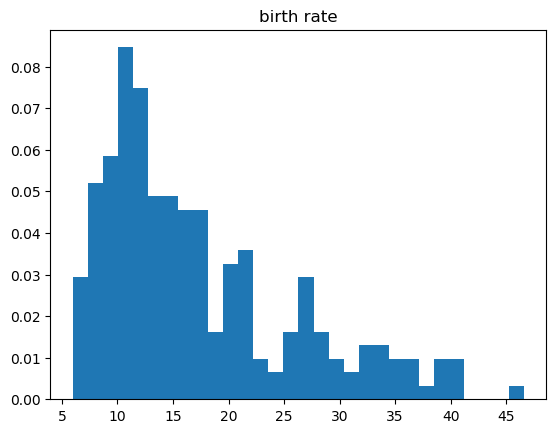

In [1127]:
count, bins, ignored = plt.hist(birth_rate_2024_arr, 30, density=True)
plt.title("birth rate")
plt.show()

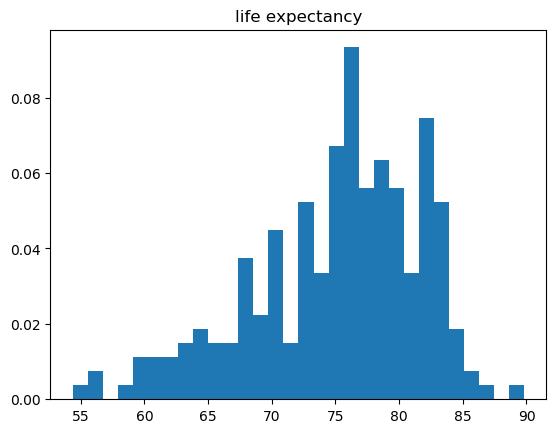

In [1128]:
count, bins, ignored = plt.hist(life_exp_2024_arr, 30, density=True)
plt.title("life expectancy")
plt.show()

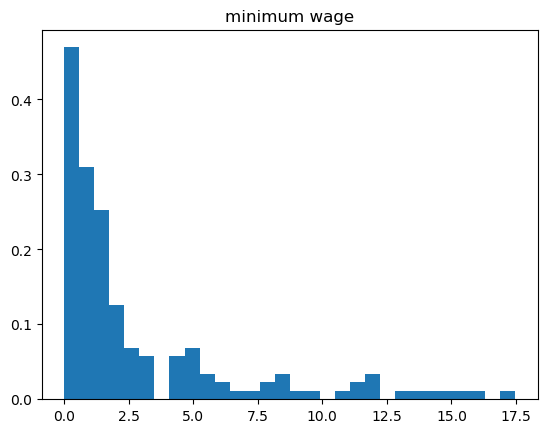

In [1129]:
count, bins, ignored = plt.hist(minimum_wage_2024_arr_clean, 30, density=True)
plt.title("minimum wage")
plt.show()

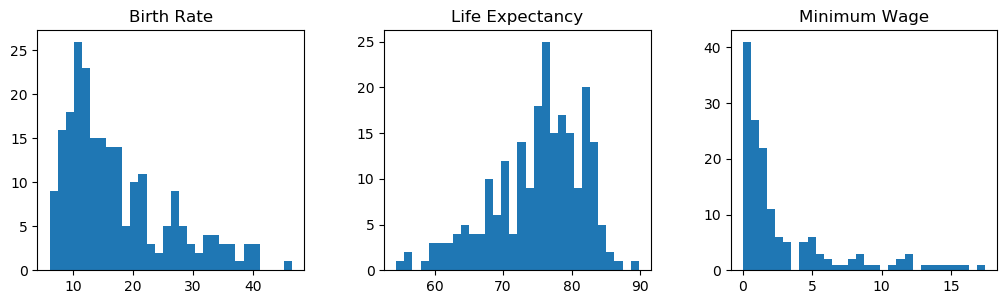

In [1130]:
# Sample data
data = np.array([birth_rate_2024_arr,life_exp_2024_arr,minimum_wage_2024_arr_clean])

# Set the containers for the plots
nrows = 1
ncols = 3
fit , ax = plt.subplots(nrows, ncols)
fit.set_figheight(3)
fit.set_figwidth(12)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

# Plot histogram
[ax[j].hist(data[j], bins=30) for j in range(ncols)]
ax[0].set_title('Birth Rate')
ax[1].set_title('Life Expectancy')
ax[2].set_title('Minimum Wage')

plt.show()  # Show the histogram


<font size="4"><b>Calculating various statistics</b></font>

In [1131]:
print('Statistics of 2024 data')

br=['Birth rate', np.mean(birth_rate_2024_arr), np.var(birth_rate_2024_arr), np.median(birth_rate_2024_arr), np.amin(birth_rate_2024_arr), np.amax(birth_rate_2024_arr)]
le=['Life expectancy', np.mean(life_exp_2024_arr), np.var(life_exp_2024_arr), np.median(life_exp_2024_arr), np.amin(life_exp_2024_arr), np.amax(life_exp_2024_arr)]
mw=['Minimum wage', np.mean(minimum_wage_2024_arr_clean), np.var(minimum_wage_2024_arr_clean), np.median(minimum_wage_2024_arr_clean), np.amin(minimum_wage_2024_arr_clean), np.amax(minimum_wage_2024_arr_clean)]

table = [[' ', 'Mean', 'Variance', 'Median', 'Minimum', 'Maximum'], br, le, mw]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Statistics of 2024 data
╒═════════════════╤══════════╤════════════╤══════════╤═══════════╤═══════════╕
│                 │     Mean │   Variance │   Median │   Minimum │   Maximum │
╞═════════════════╪══════════╪════════════╪══════════╪═══════════╪═══════════╡
│ Birth rate      │ 17.2943  │    75.11   │    14.9  │      6    │     46.6  │
├─────────────────┼──────────┼────────────┼──────────┼───────────┼───────────┤
│ Life expectancy │ 75.0648  │    44.0833 │    76.2  │     54.4  │     89.8  │
├─────────────────┼──────────┼────────────┼──────────┼───────────┼───────────┤
│ Minimum wage    │  3.01367 │    15.2364 │     1.44 │      0.01 │     17.47 │
╘═════════════════╧══════════╧════════════╧══════════╧═══════════╧═══════════╛


<font size="6"><strong><em><a id="corr">Pearson correlations</a></em></strong></font>

<font size="4"><b>Calculating the correlation between birth rate and fertility rate</b></font>

In [1132]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(birth_rate_arr, fertility_rate_arr)

print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')

Pearson correlation coefficient: 0.979
Significance (p-value): 0.000


<font size="3">Since the birth rate and fertility rate are highly correlated, we will take only the birth rate in the correlation matrix calculation.</font>

<font size="4"><b>Calculating the correlations and their p-values</b></font>

$H_{0}$: $\rho_{XY}<a$     
$H_{1}$: $\rho_{XY}\geq a$

In [1133]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient and p-value

def delete_rows(data,rows):
    count=0
    for i in rows:
        data=np.delete(data, i-count-2)
        count+=1
    return data

correlation_matrix = np.zeros(shape=(7,7))
num_comp = 21

print("First row of correlation square")

corr_coefficient, p_value = pearsonr(birth_rate_arr, life_exp_arr)
correlation_matrix[0][1] = corr_coefficient
print("Pearson correlation between birth rate and life expectancy:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from birth rate
#(rows in which the data is missing in healthy life expectancy)
rows_to_delete=[5, 6, 7, 12, 13, 16, 17, 19, 
21, 26, 29, 31, 35, 41, 44, 
47, 49, 50, 55, 56, 58, 60,
69, 72, 73, 74, 90, 91, 96, 
98, 99, 105, 108, 112, 114,
121, 128, 131, 133, 135, 141,
144, 145, 146, 147, 148, 149,
150, 154, 159, 160, 163, 166,
167, 170, 174, 176, 177, 180,
181, 189, 192]
birth_rate_arr_short = np.copy(birth_rate_arr)
birth_rate_arr_short = delete_rows(birth_rate_arr_short,rows_to_delete)
br_copy_for_healthy_life_expectancy_linreg = np.copy(birth_rate_arr_short)

corr_coefficient, p_value = pearsonr(birth_rate_arr_short, healthy_life_exp_arr_clean)
correlation_matrix[0][2] = corr_coefficient
print("Pearson correlation between birth rate and healthy life expectancy:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



corr_coefficient, p_value = pearsonr(birth_rate_arr, gdp_arr)
correlation_matrix[0][3] = corr_coefficient
print("Pearson correlation between birth rate and GDP:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from birth rate
#(rows in which the data is missing in minimum wage)
rows_to_delete=[11,14, 26, 29, 32, 45, 48,
49, 53, 56, 58, 59, 61, 69,
71,77,84,90,99,105,112,
120,121,128,129,130,141,
144,146,149,150,156,160,
161,163,167,168,169,176,
181,184,192,194]
birth_rate_arr_short=np.copy(birth_rate_arr)
birth_rate_arr_short = delete_rows(birth_rate_arr_short,rows_to_delete)
br_copy_for_minimum_wage_linreg = np.copy(birth_rate_arr_short)

corr_coefficient, p_value = pearsonr(birth_rate_arr_short, minimum_wage_arr_clean)
correlation_matrix[0][4] = corr_coefficient
print("Pearson correlation between birth rate and minimum wage:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from birth rate
#(rows in which the data is missing in CO2 emissions)
rows_to_delete=[58, 114, 121, 129, 149]
birth_rate_arr_short=np.copy(birth_rate_arr)
birth_rate_arr_short = delete_rows(birth_rate_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(birth_rate_arr_short, co2_arr_clean)
correlation_matrix[0][5] = corr_coefficient
print("Pearson correlation between birth rate and CO2:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from birth rate
#(rows in which the data is missing in forested area)
rows_to_delete=[58, 114, 121, 129, 163]
birth_rate_arr_short=np.copy(birth_rate_arr)
birth_rate_arr_short = delete_rows(birth_rate_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(birth_rate_arr_short, forest_arr_clean)
correlation_matrix[0][6] = corr_coefficient
print("Pearson correlation between birth rate and forested area:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")


#***************************************************
print("Second row of correlation square\n")

#In order to make the two arrays in the same length, we will delete rows from life expectancy
#(rows in which the data is missing in healthy life expectancy)
rows_to_delete=[5, 6, 7, 12, 13, 16, 17, 19, 
21, 26, 29, 31, 35, 41, 44, 
47, 49, 50, 55, 56, 58, 60,
69, 72, 73, 74, 90, 91, 96, 
98, 99, 105, 108, 112, 114,
121, 128, 131, 133, 135, 141,
144, 145, 146, 147, 148, 149,
150, 154, 159, 160, 163, 166,
167, 170, 174, 176, 177, 180,
181, 189, 192]
life_exp_arr_short = np.copy(life_exp_arr)
life_exp_arr_short = delete_rows(life_exp_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(life_exp_arr_short, healthy_life_exp_arr_clean)
correlation_matrix[1][2] = corr_coefficient
print("Pearson correlation between life expectancy and healthy life expectancy:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



corr_coefficient, p_value = pearsonr(life_exp_arr, gdp_arr)
correlation_matrix[1][3] = corr_coefficient
print("Pearson correlation between life expectancy and GDP:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from life expectancy
#(rows in which the data is missing in minimum wage)
rows_to_delete=[11,14, 26, 29, 32, 45, 48,
49, 53, 56, 58, 59, 61, 69,
71,77,84,90,99,105,112,
120,121,128,129,130,141,
144,146,149,150,156,160,
161,163,167,168,169,176,
181,184,192,194]
life_exp_arr_short = np.copy(life_exp_arr)
life_exp_arr_short = delete_rows(life_exp_arr_short,rows_to_delete)
life_exp_copy_for_multi_linreg = np.copy(life_exp_arr_short)


corr_coefficient, p_value = pearsonr(life_exp_arr_short, minimum_wage_arr_clean)
correlation_matrix[1][4] = corr_coefficient
print("Pearson correlation between life expectancy and minimum wage:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from life expectancy
#(rows in which the data is missing in CO2 emissions)
rows_to_delete=[58, 114, 121, 129, 149]
life_exp_arr_short = np.copy(life_exp_arr)
life_exp_arr_short = delete_rows(life_exp_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(life_exp_arr_short, co2_arr_clean)
correlation_matrix[1][5] = corr_coefficient
print("Pearson correlation between life expectancy and CO2:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")

#In order to make the two arrays in the same length, we will delete rows from life expectancy
#(rows in which the data is missing in forested area)
rows_to_delete=[58, 114, 121, 129, 163]
life_exp_arr_short = np.copy(life_exp_arr)
life_exp_arr_short = delete_rows(life_exp_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(life_exp_arr_short, forest_arr_clean)
correlation_matrix[1][6] = corr_coefficient
print("Pearson correlation between life expectancy and forested area:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#***************************************************
print("Third row of correlation square\n")

#In order to make the two arrays in the same length, we will delete rows from GDP
#(rows in which the data is missing in healthy life expectancy)
rows_to_delete=[5, 6, 7, 12, 13, 16, 17, 19, 
21, 26, 29, 31, 35, 41, 44, 
47, 49, 50, 55, 56, 58, 60,
69, 72, 73, 74, 90, 91, 96, 
98, 99, 105, 108, 112, 114,
121, 128, 131, 133, 135, 141,
144, 145, 146, 147, 148, 149,
150, 154, 159, 160, 163, 166,
167, 170, 174, 176, 177, 180,
181, 189, 192]
gdp_arr_short = np.copy(gdp_arr)
gdp_arr_short = delete_rows(gdp_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(healthy_life_exp_arr_clean, gdp_arr_short)
correlation_matrix[2][3] = corr_coefficient
print("Pearson correlation between healthy life expectancy and GDP:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from healthy life expectancy AND minimum wage
#(rows in which the data is missing in both columns)
rows_to_delete1=[11,14, 26, 29, 32, 45, 48,
49, 53, 56, 58, 59, 61, 69,
71,77,84,90,99,105,112,
120,121,128,129,130,141,
144,146,149,150,156,160,
161,163,167,168,169,176,
181,184,192,194]
rows_to_delete2=[5, 6, 7, 12, 13, 16, 17, 19, 
21, 26, 29, 31, 35, 41, 44, 
47, 49, 50, 55, 56, 58, 60,
69, 72, 73, 74, 90, 91, 96, 
98, 99, 105, 108, 112, 114,
121, 128, 131, 133, 135, 141,
144, 145, 146, 147, 148, 149,
150, 154, 159, 160, 163, 166,
167, 170, 174, 176, 177, 180,
181, 189, 192]


rows_to_delete = np.concatenate((rows_to_delete1,rows_to_delete2))
rows_to_delete = np.unique(rows_to_delete)

healthy_life_exp_arr_short = np.copy(healthy_life_exp_arr)
healthy_life_exp_arr_short = delete_rows(healthy_life_exp_arr_short,rows_to_delete)
minimum_wage_arr_short = np.copy(minimum_wage_arr)
minimum_wage_arr_short = delete_rows(minimum_wage_arr_short,rows_to_delete)            

corr_coefficient, p_value = pearsonr(healthy_life_exp_arr_short, minimum_wage_arr_short)
correlation_matrix[2][4] = corr_coefficient
print("Pearson correlation between healthy life expectancy and minimum wage:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from healthy life expectancy AND CO2
#(rows in which the data is missing in both columns)
rows_to_delete1=[58, 114, 121, 129, 149]
rows_to_delete2=[5, 6, 7, 12, 13, 16, 17, 19, 
21, 26, 29, 31, 35, 41, 44, 
47, 49, 50, 55, 56, 58, 60,
69, 72, 73, 74, 90, 91, 96, 
98, 99, 105, 108, 112, 114,
121, 128, 131, 133, 135, 141,
144, 145, 146, 147, 148, 149,
150, 154, 159, 160, 163, 166,
167, 170, 174, 176, 177, 180,
181, 189, 192]
rows_to_delete = np.concatenate((rows_to_delete1,rows_to_delete2))
rows_to_delete = np.unique(rows_to_delete)

healthy_life_exp_arr_short = np.copy(healthy_life_exp_arr)
healthy_life_exp_arr_short = delete_rows(healthy_life_exp_arr_short,rows_to_delete)
co2_arr_short = np.copy(co2_arr)
co2_arr_short = delete_rows(co2_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(healthy_life_exp_arr_short, co2_arr_short)
correlation_matrix[2][5] = corr_coefficient
print("Pearson correlation between healthy life expectancy and CO2:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from healthy life expectancy AND forested area
#(rows in which the data is missing in both columns)
rows_to_delete1=[58, 114, 121, 129, 163]
rows_to_delete2=[5, 6, 7, 12, 13, 16, 17, 19, 
21, 26, 29, 31, 35, 41, 44, 
47, 49, 50, 55, 56, 58, 60,
69, 72, 73, 74, 90, 91, 96, 
98, 99, 105, 108, 112, 114,
121, 128, 131, 133, 135, 141,
144, 145, 146, 147, 148, 149,
150, 154, 159, 160, 163, 166,
167, 170, 174, 176, 177, 180,
181, 189, 192]
rows_to_delete = np.concatenate((rows_to_delete1,rows_to_delete2))
rows_to_delete = np.unique(rows_to_delete)

healthy_life_exp_arr_short = np.copy(healthy_life_exp_arr)
healthy_life_exp_arr_short = delete_rows(healthy_life_exp_arr_short,rows_to_delete)
forest_arr_short = np.copy(forest_arr)
forest_arr_short = delete_rows(forest_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(healthy_life_exp_arr_short, forest_arr_short)
correlation_matrix[2][6] = corr_coefficient
print("Pearson correlation between healthy life expectancy and forested area:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#***************************************************
print("Fourth row of correlation square\n")


#In order to make the two arrays in the same length, we will delete rows from GDP
#(rows in which the data is missing in minimum wage)
rows_to_delete=[11,14, 26, 29, 32, 45, 48,
49, 53, 56, 58, 59, 61, 69,
71,77,84,90,99,105,112,
120,121,128,129,130,141,
144,146,149,150,156,160,
161,163,167,168,169,176,
181,184,192,194]
gdp_arr_short = np.copy(gdp_arr)
gdp_arr_short = delete_rows(gdp_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(gdp_arr_short, minimum_wage_arr_clean)
correlation_matrix[3][4] = corr_coefficient
print("Pearson correlation between GDP and minimum wage:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from GDP
#(rows in which the data is missing in CO2 emissions)
rows_to_delete=[58, 114, 121, 129, 149]
gdp_arr_short = np.copy(gdp_arr)
gdp_arr_short = delete_rows(gdp_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(gdp_arr_short, co2_arr_clean)
correlation_matrix[3][5] = corr_coefficient
print("Pearson correlation between GDP and CO2:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")

#In order to make the two arrays in the same length, we will delete rows from GDP
#(rows in which the data is missing in forested area)
rows_to_delete=[58, 114, 121, 129, 163]
gdp_arr_short = np.copy(gdp_arr)
gdp_arr_short = delete_rows(gdp_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(gdp_arr_short, forest_arr_clean)
correlation_matrix[3][6] = corr_coefficient
print("Pearson correlation between gdp and forested area:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#***************************************************
print("Fifth row of correlation square\n")


#In order to make the two arrays in the same length, we will delete rows from minimum wage AND CO2
#(rows in which the data is missing in both columns)
rows_to_delete1=[58, 114, 121, 129, 149]
rows_to_delete2=[11,14, 26, 29, 32, 45, 48,
49, 53, 56, 58, 59, 61, 69,
71,77,84,90,99,105,112,
120,121,128,129,130,141,
144,146,149,150,156,160,
161,163,167,168,169,176,
181,184,192,194]
rows_to_delete = np.concatenate((rows_to_delete1,rows_to_delete2))
rows_to_delete = np.unique(rows_to_delete)

minimum_wage_arr_short = np.copy(minimum_wage_arr)
minimum_wage_arr_short = delete_rows(minimum_wage_arr_short,rows_to_delete)
co2_arr_short = np.copy(co2_arr)
co2_arr_short = delete_rows(co2_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(minimum_wage_arr_short, co2_arr_short)
correlation_matrix[4][5] = corr_coefficient
print("Pearson correlation between minimum wage and CO2:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#In order to make the two arrays in the same length, we will delete rows from minimum wage AND forested area
#(rows in which the data is missing in both columns)
rows_to_delete1=[58, 114, 121, 129, 163]
rows_to_delete2=[11,14, 26, 29, 32, 45, 48,
49, 53, 56, 58, 59, 61, 69,
71,77,84,90,99,105,112,
120,121,128,129,130,141,
144,146,149,150,156,160,
161,163,167,168,169,176,
181,184,192,194]
rows_to_delete = np.concatenate((rows_to_delete1,rows_to_delete2))
rows_to_delete = np.unique(rows_to_delete)

minimum_wage_arr_short = np.copy(minimum_wage_arr)
minimum_wage_arr_short = delete_rows(minimum_wage_arr_short,rows_to_delete)
forest_arr_short = np.copy(forest_arr)
forest_arr_short = delete_rows(forest_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(minimum_wage_arr_short, forest_arr_short)
correlation_matrix[4][6] = corr_coefficient
print("Pearson correlation between minimum wage and forested area:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")



#***************************************************
print("Sixth row of correlation square\n")

#In order to make the two arrays in the same length, we will delete rows from CO2 emissions AND forested area
#(rows in which the data is missing in both columns)
rows_to_delete1=[58, 114, 121, 129, 163]
rows_to_delete2=[58, 114, 121, 129, 149]
rows_to_delete = np.concatenate((rows_to_delete1,rows_to_delete2))
rows_to_delete = np.unique(rows_to_delete)

co2_arr_short = np.copy(co2_arr)
co2_arr_short = delete_rows(co2_arr_short,rows_to_delete)
forest_arr_short = np.copy(forest_arr)
forest_arr_short = delete_rows(forest_arr_short,rows_to_delete)

corr_coefficient, p_value = pearsonr(co2_arr_short, forest_arr_short)
correlation_matrix[5][6] = corr_coefficient
print("Pearson correlation between CO2 emissions and forested area:")
print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')
if p_value <0.05/num_comp: # Using Bonferroni correction to cope with the multiple comparisons problem
    print("Reject null hypothesis >> The correlation coefficient is less than this value")
else:
    print("Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value")
print("\n")


First row of correlation square
Pearson correlation between birth rate and life expectancy:
Pearson correlation coefficient: -0.871
Significance (p-value): 0.000
Reject null hypothesis >> The correlation coefficient is less than this value


Pearson correlation between birth rate and healthy life expectancy:
Pearson correlation coefficient: -0.874
Significance (p-value): 0.000
Reject null hypothesis >> The correlation coefficient is less than this value


Pearson correlation between birth rate and GDP:
Pearson correlation coefficient: -0.180
Significance (p-value): 0.012
Fail to reject null hypothesis >> The correlation coefficient is greater than or equal to this value


Pearson correlation between birth rate and minimum wage:
Pearson correlation coefficient: -0.503
Significance (p-value): 0.000
Reject null hypothesis >> The correlation coefficient is less than this value


Pearson correlation between birth rate and CO2:
Pearson correlation coefficient: -0.156
Significance (p-value): 

<font size="4"><b>Drawing the correlation matrix</b></font>

In [1134]:
def fill_matrix(m):
    for j in range(0,7):
        m[j][j]=1
        for i in range(0,j):
            m[j][i]=m[i][j]
    return m

def round_digits(m):
    for i in range(0,7):
        for j in range(0,7):
            m[i][j]=round(m[i][j],2)
            
    return m

filled_matrix = fill_matrix(correlation_matrix)
rounded_filled_matrix = round_digits(filled_matrix)

print(rounded_filled_matrix)

[[ 1.   -0.87 -0.87 -0.18 -0.5  -0.16 -0.07]
 [-0.87  1.    0.96  0.17  0.62  0.12  0.01]
 [-0.87  0.96  1.    0.15  0.62  0.1   0.12]
 [-0.18  0.17  0.15  1.    0.21  0.92 -0.  ]
 [-0.5   0.62  0.62  0.21  1.    0.08 -0.03]
 [-0.16  0.12  0.1   0.92  0.08  1.   -0.03]
 [-0.07  0.01  0.12 -0.   -0.03 -0.03  1.  ]]


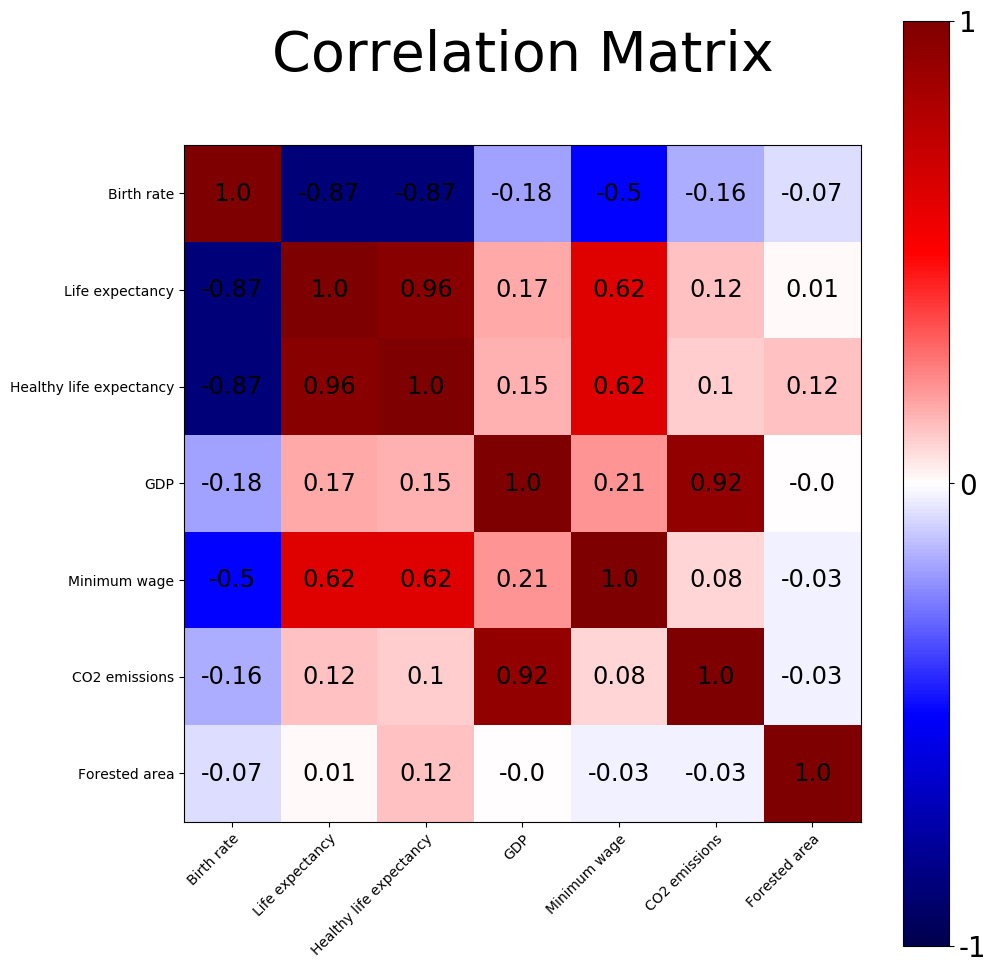

In [1135]:
parameters = ["Birth rate","Life expectancy","Healthy life expectancy","GDP","Minimum wage","CO2 emissions","Forested area"]

fig, ax = plt.subplots()
im = ax.imshow(rounded_filled_matrix)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(parameters)))
ax.set_xticklabels(parameters)
ax.set_yticks(np.arange(len(parameters)))
ax.set_yticklabels(parameters)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(parameters)):
    for j in range(len(parameters)):
        text = ax.text(j, i, filled_matrix[i][j],
                       ha="center", va="center", fontsize="xx-large", color="black")


# Setting table size and text size
fig.set_size_inches(10.5, 10.5)
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

# Adding color bar
data = filled_matrix
cax = ax.imshow(data, vmin=-1, vmax=1, cmap='seismic')
cbar = fig.colorbar(cax, ticks=[-1, 0, 1], format=mpl.ticker.FixedFormatter(['-1', '0', '1']))

# final settings
ax.set_title("Correlation Matrix\n", fontsize=40)
fig.tight_layout()
plt.show()



<font size="6"><strong><em><a id="reg">Linear regression</a></em></strong></font>

<font size="4"><b>Preparations</b></font>

In [1136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#In order to make the arrays of birth rate and minimum wage in the same length, we will delete rows from birth rate
#(rows in which the data is missing in minimum wage)
rows_to_delete=[3, 9, 10, 12, 18, 20, 21, 22, 23, 25, 27, 28 , 29, 30, 32, 35, 36, 42, 43, 45, 46,
 47, 48, 49, 51, 52, 53, 54, 57, 58, 60, 61, 63, 65, 66, 70, 72, 77, 79, 84, 85, 89,
 91, 99, 104, 109, 113, 117, 123, 127, 133, 134, 139, 142, 143, 151, 154, 157, 160,
 163, 170, 178, 185, 188, 192, 193, 196, 197, 198, 199, 201, 203, 204, 207, 218, 221, 226
]
birth_rate_2024_arr_short=np.copy(birth_rate_2024_arr)
birth_rate_2024_arr_short = delete_rows(birth_rate_2024_arr_short,rows_to_delete)

<font size="4"><b>Birth-rate vs. Life expectancy:</b></font>

$Y=\beta_0+\beta_1X_1$

In [1137]:
# setting and formatting train and test data
x_train = life_exp_arr_clean
x_train = np.reshape(x_train,(x_train.size,1))
y_train = birth_rate_arr


x_test = life_exp_2024_arr
x_test = np.reshape(x_test,(x_test.size,1))
y_test = birth_rate_2024_arr

In [1138]:
# model parameters
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

Intercept:  102.28996357778689
Coefficient:  [-1.13547012]


In [1139]:
# model predictions compared to ground truth on a specific data point
train_predictions = lin_reg.predict(x_train)
test_predictions =  lin_reg.predict(x_test)


print("Israel's life expectancy in 2023:",x_train[81][0])
print("Israel's birth rate prediction in 2023:",train_predictions[81])
print("Israel's birth rate ground truth data in 2023:",y_train[81])
print("**********")
print("Israel's life expectancy in 2024:",x_test[15][0])
print("Israel's birth rate prediction in 2024:",test_predictions[15])
print("Israel's birth rate ground truth data in 2024:",y_test[15])

Israel's life expectancy in 2023: 82.8
Israel's birth rate prediction in 2023: 8.27303758211076
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's life expectancy in 2024: 83.1
Israel's birth rate prediction in 2024: 7.932396545894548
Israel's birth rate ground truth data in 2024: 19.1


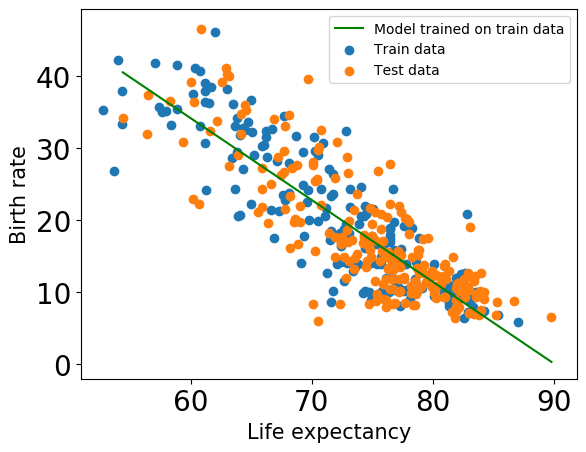

In [1140]:
#model visualization
plt.scatter(x_train, y_train, label='Train data')
plt.scatter(x_test, y_test, label='Test data')
plt.plot(x_test, lin_reg.predict(x_test), label='Model trained on train data', color='g')
plt.xlabel('Life expectancy', fontsize=15)
plt.ylabel('Birth rate', fontsize=15)
plt.legend()

In [1141]:
# model evaluation
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {r2}
""")


    train R2: 0.7590473825947199
    test R2: 0.6735013751963974



<font size="4"><b>Birth-rate vs. Minimum wage</b></font>

$Y=\beta_0+\beta_2X_2$

In [1142]:
# setting and formatting train and test data
x_train = minimum_wage_arr_clean
x_train = np.reshape(x_train,(x_train.size,1))
y_train = br_copy_for_minimum_wage_linreg


x_test = minimum_wage_2024_arr_clean
x_test = np.reshape(x_test,(x_test.size,1))
y_test = birth_rate_2024_arr_short

In [1143]:
# model parameters
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

Intercept:  23.989537123457627
Coefficient:  [-1.67486196]


In [1144]:
# predictions
train_predictions = lin_reg.predict(x_train)
test_predictions = lin_reg.predict(x_test)

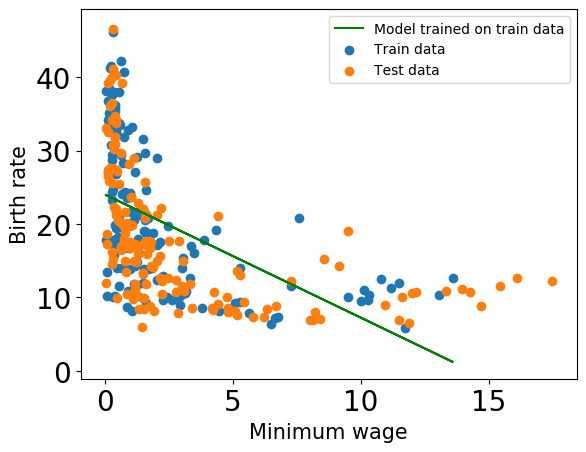

In [1145]:
# model visualization
plt.scatter(x_train, y_train, label='Train data')
plt.scatter(x_test, y_test, label='Test data')
plt.plot(x_train, lin_reg.predict(x_train), label='Model trained on train data', color='g')
plt.xlabel('Minimum wage', fontsize=15)
plt.ylabel('Birth rate', fontsize=15)
plt.legend()

In [1146]:
# model evaluation
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {r2}
""")


    train R2: 0.25307980310296385
    test R2: 0.18834781497505826



<font size="4"><b>Birth-rate vs. Minimum wage with a non-linear transformation (exponential)</b></font>

$Y=\beta_0+\beta_2\cdot f_1(X_2)$

In [1147]:
########################### adding a non-linear exponential transformation to the x parameter ###########################
from scipy.optimize import minimize_scalar
x_train = np.reshape(x_train,(x_train.size))

e = 2.72 # initial exponential base

#define cost function
def cost_function(e):
    r = np.corrcoef(y_train,e**x_train) #returns correlation matrix
    #print each iteration
    print('r value: {:0.4f} exp: {:.4f}'.format(r[0][1],e)) 
    return -abs(r[0][1])

# find best exponential base for the transformation in order to fit the data to a linear model
res = minimize_scalar(cost_function,bounds=(0.1, 10), method='bounded')
print(res)
exp = res.x

# apply the transformation
x_train_transformed = exp**x_train
x_test_transformed = exp**x_test

x_train_transformed = np.reshape(x_train_transformed,(x_train_transformed.size,1))
x_test_transformed = np.reshape(x_test_transformed,(x_test_transformed.size,1))

r value: -0.1132 exp: 3.8815
r value: -0.0963 exp: 6.2185
r value: -0.1521 exp: 2.4371
r value: -0.2545 exp: 1.5444
r value: 0.5076 exp: 0.9927
r value: 0.6446 exp: 0.6517
r value: 0.6538 exp: 0.4410
r value: 0.6553 exp: 0.5128
r value: 0.6554 exp: 0.4995
r value: 0.6554 exp: 0.5019
r value: 0.6554 exp: 0.5020
r value: 0.6554 exp: 0.5020
r value: 0.6554 exp: 0.5020
r value: 0.6554 exp: 0.5020
     fun: -0.65538518548005
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 0.5020242360215535


In [1148]:
# model parameters
lin_reg = LinearRegression()
lin_reg.fit(x_train_transformed, y_train)
lin_reg.intercept_, lin_reg.coef_
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

Intercept:  10.391662572153425
Coefficient:  [21.09313154]


In [1149]:
# model predictions compared to ground truth on a specific data point
train_predictions_transformed = lin_reg.predict(x_train_transformed)
test_predictions_transformed = lin_reg.predict(x_test_transformed)

import math

def inverse_transform_exp(y,e):
    return math.log(y)/math.log(e)

print("Israel's minimum wage in 2023:",inverse_transform_exp(x_train_transformed[65][0],res.x))
print("Israel's birth rate prediction in 2023:",train_predictions_transformed[65])
print("Israel's birth rate ground truth data in 2023:",y_train[65])
print("**********")
print("Israel's minimum wage in 2024:",inverse_transform_exp(x_test_transformed[11][0],res.x))
print("Israel's birth rate prediction in 2024:",test_predictions_transformed[11])
print("Israel's birth rate ground truth data in 2024:",y_test[11])

Israel's minimum wage in 2023: 7.579999999999999
Israel's birth rate prediction in 2023: 10.505329511225877
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's minimum wage in 2024: 9.48
Israel's birth rate prediction in 2024: 10.422353573940748
Israel's birth rate ground truth data in 2024: 19.1


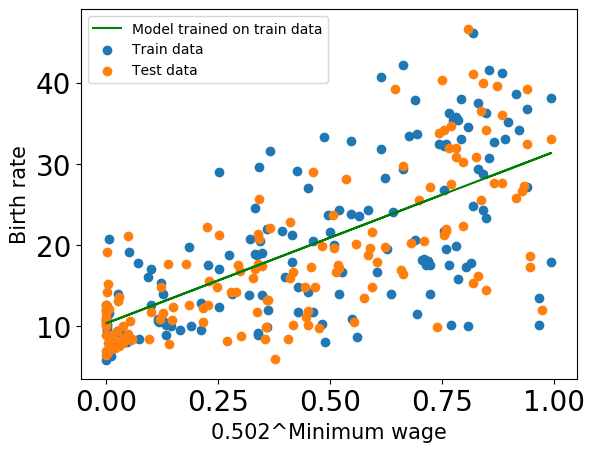

In [1150]:
# model visualization after transformation
plt.scatter(x_train_transformed, y_train, label='Train data')
plt.scatter(x_test_transformed, y_test, label='Test data')
plt.plot(x_train_transformed, lin_reg.predict(x_train_transformed), label='Model trained on train data', color='g')
plt.xlabel('0.502^Minimum wage', fontsize=15)
plt.ylabel('Birth rate', fontsize=15)
plt.legend()

In [1151]:
# model evaluation
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions_transformed)
r2 = r2_score(y_true=y_test,y_pred=test_predictions_transformed)
print(f"""
    train R2: {train_r2}
    test R2: {r2}
""")


    train R2: 0.4295297413467195
    test R2: 0.5293819350605169



<font size="4"><b>Birth-rate vs. Minimum wage with a non-linear transformation (polynomial)</b></font>

$Y=\beta_0+\beta_2\cdot f_2(X_2)$

In [1152]:
########################### adding a non-linear polynomial transformation to the x parameter ###########################
from scipy.optimize import minimize_scalar
x_train = np.reshape(x_train,(x_train.size))

e = 2.72 # initial exponential base

#define cost function
def cost_function(e):
    r = np.corrcoef(y_train,x_train**e) #returns correlation matrix
    #print each iteration
    print('r value: {:0.4f} exp: {:.4f}'.format(r[0][1],e)) 
    return -abs(r[0][1])

# find best exponential base for the transformation in order to fit the data to a linear model
res = minimize_scalar(cost_function,bounds=(0.1, 10), method='bounded')
print(res)
power = res.x

# apply the transformation
x_train_transformed = x_train**power
x_test_transformed = x_test**power

x_train_transformed = np.reshape(x_train_transformed,(x_train_transformed.size,1))
x_test_transformed = np.reshape(x_test_transformed,(x_test_transformed.size,1))

r value: -0.2723 exp: 3.8815
r value: -0.2159 exp: 6.2185
r value: -0.3370 exp: 2.4371
r value: -0.4195 exp: 1.5444
r value: -0.5044 exp: 0.9927
r value: -0.5663 exp: 0.6517
r value: -0.5998 exp: 0.4410
r value: -0.6139 exp: 0.3107
r value: -0.6183 exp: 0.2302
r value: -0.6186 exp: 0.1598
r value: -0.6190 exp: 0.1884
r value: -0.6190 exp: 0.1892
r value: -0.6190 exp: 0.1886
r value: -0.6190 exp: 0.1886
r value: -0.6190 exp: 0.1886
     fun: -0.6189684525057737
 message: 'Solution found.'
    nfev: 15
  status: 0
 success: True
       x: 0.18860493803721104


In [1153]:
# model parameters
lin_reg = LinearRegression()
lin_reg.fit(x_train_transformed, y_train)
lin_reg.intercept_, lin_reg.coef_
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

Intercept:  45.26465327099736
Coefficient:  [-24.12928467]


In [1154]:
# model predictions compared to ground truth on a specific data point
train_predictions_transformed = lin_reg.predict(x_train_transformed)
test_predictions_transformed = lin_reg.predict(x_test_transformed)

def inverse_transform_poly(y,e):
    return y**(1/e)

print("Israel's minimum wage in 2023:",inverse_transform_poly(x_train_transformed[65][0],res.x))
print("Israel's birth rate prediction in 2023:",train_predictions_transformed[65])
print("Israel's birth rate ground truth data in 2023:",y_train[65])
print("**********")
print("Israel's minimum wage in 2024:",inverse_transform_poly(x_test_transformed[11][0],res.x))
print("Israel's birth rate prediction in 2024:",test_predictions_transformed[11])
print("Israel's birth rate ground truth data in 2024:",y_test[11])

Israel's minimum wage in 2023: 7.579999999999996
Israel's birth rate prediction in 2023: 9.909363335725466
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's minimum wage in 2024: 9.479999999999997
Israel's birth rate prediction in 2024: 8.385977087655185
Israel's birth rate ground truth data in 2024: 19.1


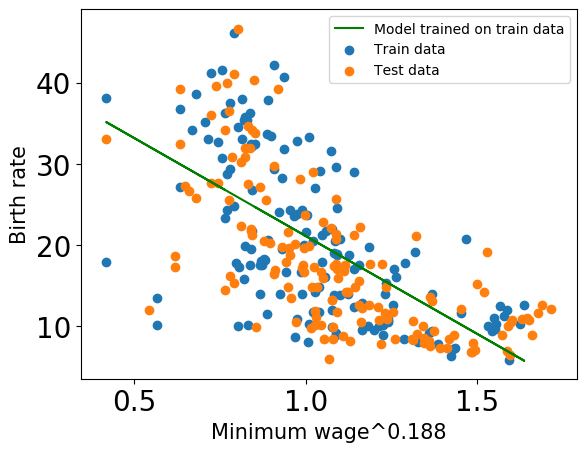

In [1155]:
# model visualization after transformation
plt.scatter(x_train_transformed, y_train, label='Train data')
plt.scatter(x_test_transformed, y_test, label='Test data')
plt.plot(x_train_transformed, lin_reg.predict(x_train_transformed), label='Model trained on train data', color='g')
plt.xlabel('Minimum wage^0.188', fontsize=15)
plt.ylabel('Birth rate', fontsize=15)
plt.legend()

In [1156]:
# model evaluation
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions_transformed)
r2 = r2_score(y_true=y_test,y_pred=test_predictions_transformed)
print(f"""
    train R2: {train_r2}
    test R2: {r2}
""")


    train R2: 0.3831219451973922
    test R2: 0.4454463659232568



<font size="6"><strong><em><a id="multi_reg">Multilinear regression</a></em></strong></font>

<font size="4"><b>Preparations</b></font>

In [1157]:
#In order to make the three arrays in the same length, we will delete rows from life expectancy
#(rows in which the data is missing in minimum wage)
rows_to_delete=[3, 9, 10, 12, 18, 20, 21, 22, 23, 25, 27, 28 , 29, 30, 32, 35, 36, 42, 43, 45, 46,
 47, 48, 49, 51, 52, 53, 54, 57, 58, 60, 61, 63, 65, 66, 70, 72, 77, 79, 84, 85, 89,
 91, 99, 104, 109, 113, 117, 123, 127, 133, 134, 139, 142, 143, 151, 154, 157, 160,
 163, 170, 178, 185, 188, 192, 193, 196, 197, 198, 199, 201, 203, 204, 207, 218, 221, 226
]
life_exp_2024_arr_short=np.copy(life_exp_2024_arr)
life_exp_2024_arr_short = delete_rows(life_exp_2024_arr_short,rows_to_delete)

<font size="4"><b>Normalize data</b></font>

$Z = \frac{X – \mu}{\sigma}$

In [1158]:
# Using zscore normalization for linear regression
life_exp_copy_for_multi_linreg_normalized = stats.zscore(life_exp_copy_for_multi_linreg, axis=0, ddof=0)
minimum_wage_arr_clean_normalized = stats.zscore(minimum_wage_arr_clean, axis=0, ddof=0)

life_exp_2024_arr_short_normalized = stats.zscore(life_exp_2024_arr_short, axis=0, ddof=0)
minimum_wage_2024_arr_clean_normalized = stats.zscore(minimum_wage_2024_arr_clean, axis=0, ddof=0)

<font size="4"><b>Birth rate vs. (Life expectancy AND Minimum wage)</b></font>

$Y=\beta_0+\beta_1Z_1+\beta_2Z_2$

In [1159]:
# setting and formatting train and test data
x_train = np.column_stack((life_exp_copy_for_multi_linreg_normalized, minimum_wage_arr_clean_normalized))
y_train = br_copy_for_minimum_wage_linreg

x_labels = ['Life expectancy', 'Minimum wage']
y_label = 'Birth rate'

x_test = np.column_stack((life_exp_2024_arr_short_normalized, minimum_wage_2024_arr_clean_normalized))
y_test = birth_rate_2024_arr_short

In [1160]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  20.314666666666653
Coefficients:


[('Life expectancy', -8.827761799966625), ('Minimum wage', 0.5195551375935649)]

In [1161]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)


print("Israel's life expectancy in 2023:",life_exp_copy_for_multi_linreg[65])
print("Israel's minimum wage in 2023:",minimum_wage_arr_clean[65])
print("Israel's birth rate prediction in 2023:",train_predictions[65])
print("Israel's birth rate ground truth data in 2023:",y_train[65])
print("**********")
print("Israel's life expectancy in 2024:",life_exp_2024_arr_short[11])
print("Israel's minimum wage in 2024:",minimum_wage_2024_arr_clean[11])
print("Israel's birth rate prediction in 2024:",test_predictions[11])
print("Israel's birth rate ground truth data in 2024:",y_test[11])

Israel's life expectancy in 2023: 82.8
Israel's minimum wage in 2023: 7.58
Israel's birth rate prediction in 2023: 8.591016676425994
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's life expectancy in 2024: 83.1
Israel's minimum wage in 2024: 9.48
Israel's birth rate prediction in 2024: 9.552285281037182
Israel's birth rate ground truth data in 2024: 19.1


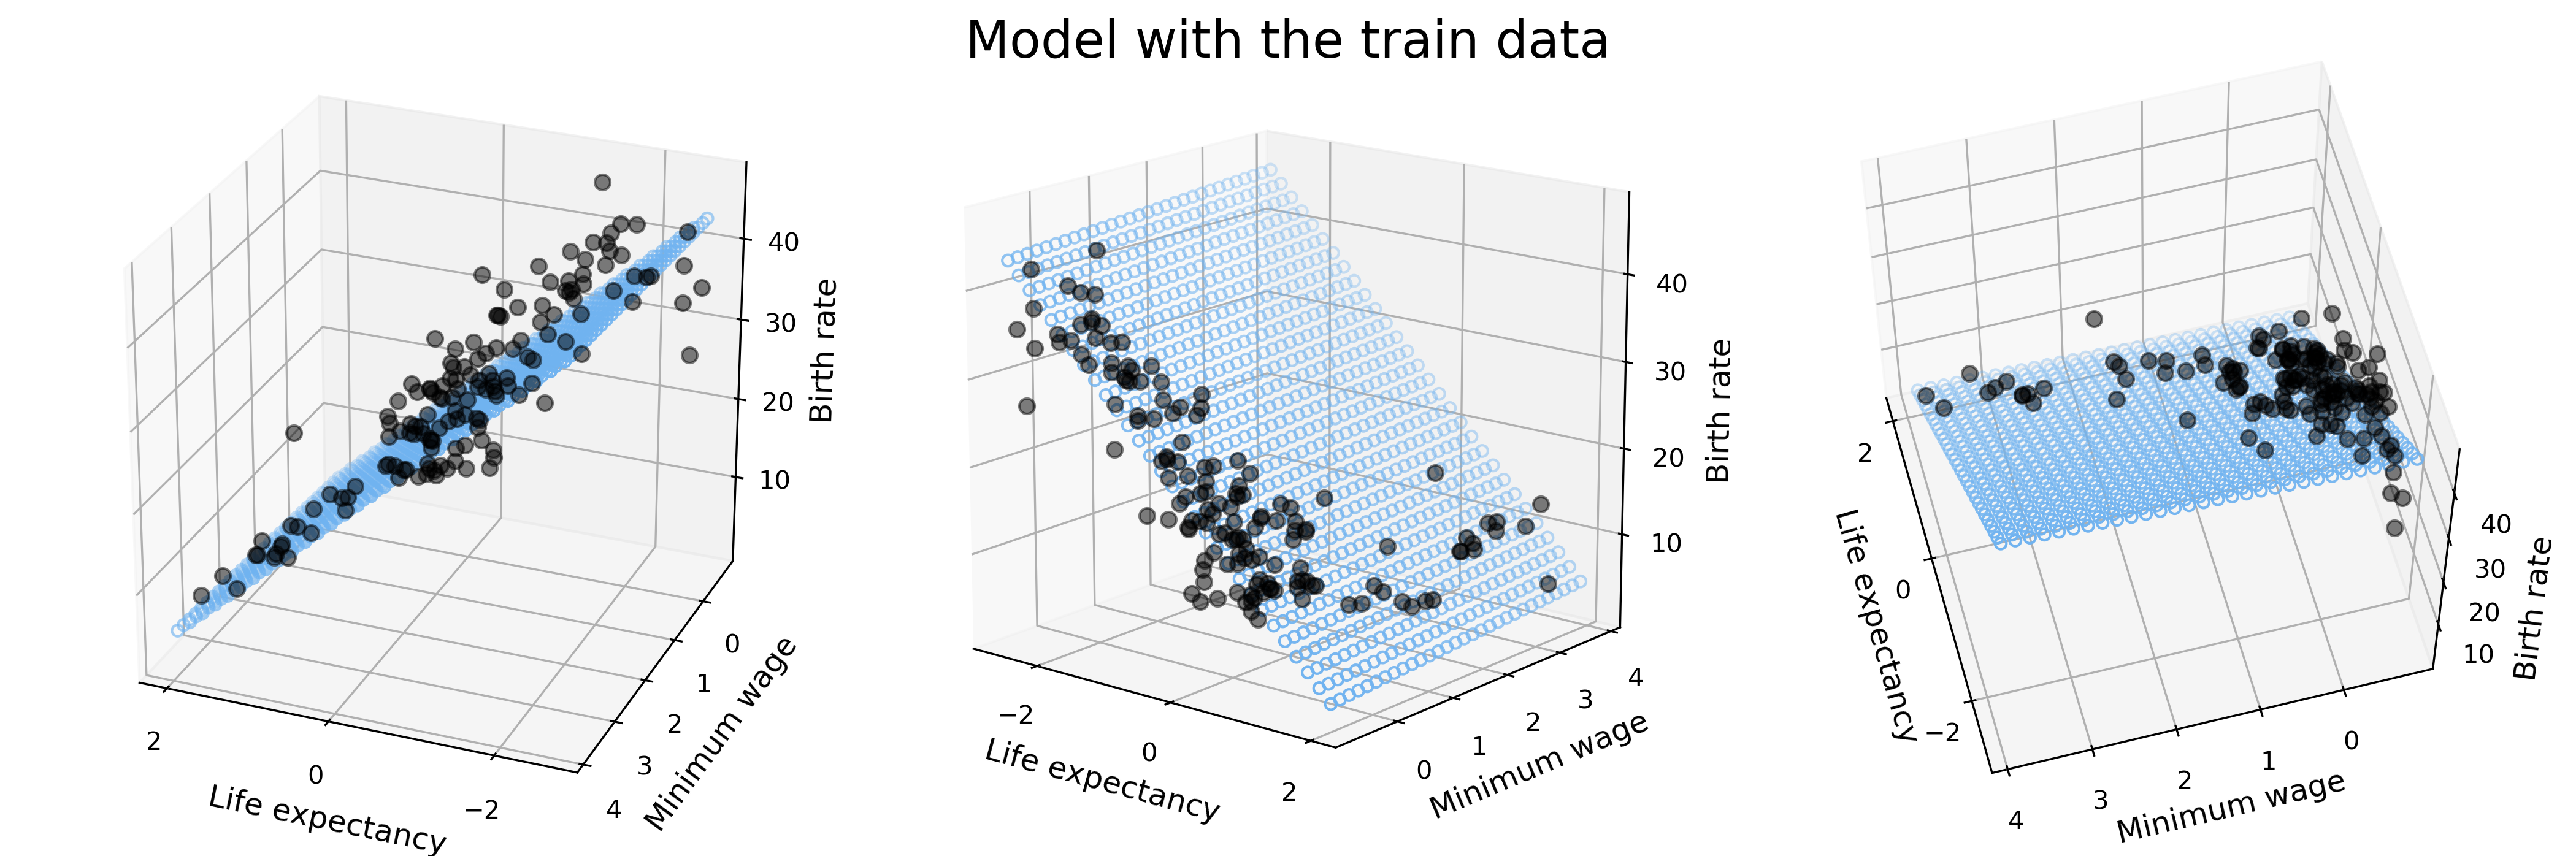

In [1162]:
############################## model visualization ##############################
# taken from: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

from mpl_toolkits.mplot3d import Axes3D


############################## plotting model + train data ##############################

# Prepare model data point for visualization:

x = x_train[:,0]
y = x_train[:,1]
z = y_train

x_pred = np.linspace(min(x), max(x), 30)  # range of life_expectancy values
y_pred = np.linspace(min(y), max(y), 30)  # range of minimum wage values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) # return a tuple of coordinate matrices from coordinate vectors
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = mlr.predict(model_viz)


# plot:

plt.style.use('default')
fig = plt.figure(figsize=(14.1, 4.7), dpi=300)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5) # plot the data points
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0') # plot the hyperplane
    ax.set_xlabel('Life expectancy', fontsize=12)
    ax.set_ylabel('Minimum wage', fontsize=12)
    ax.set_zlabel('Birth rate', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Model with the train data', fontsize=20)

fig.tight_layout()

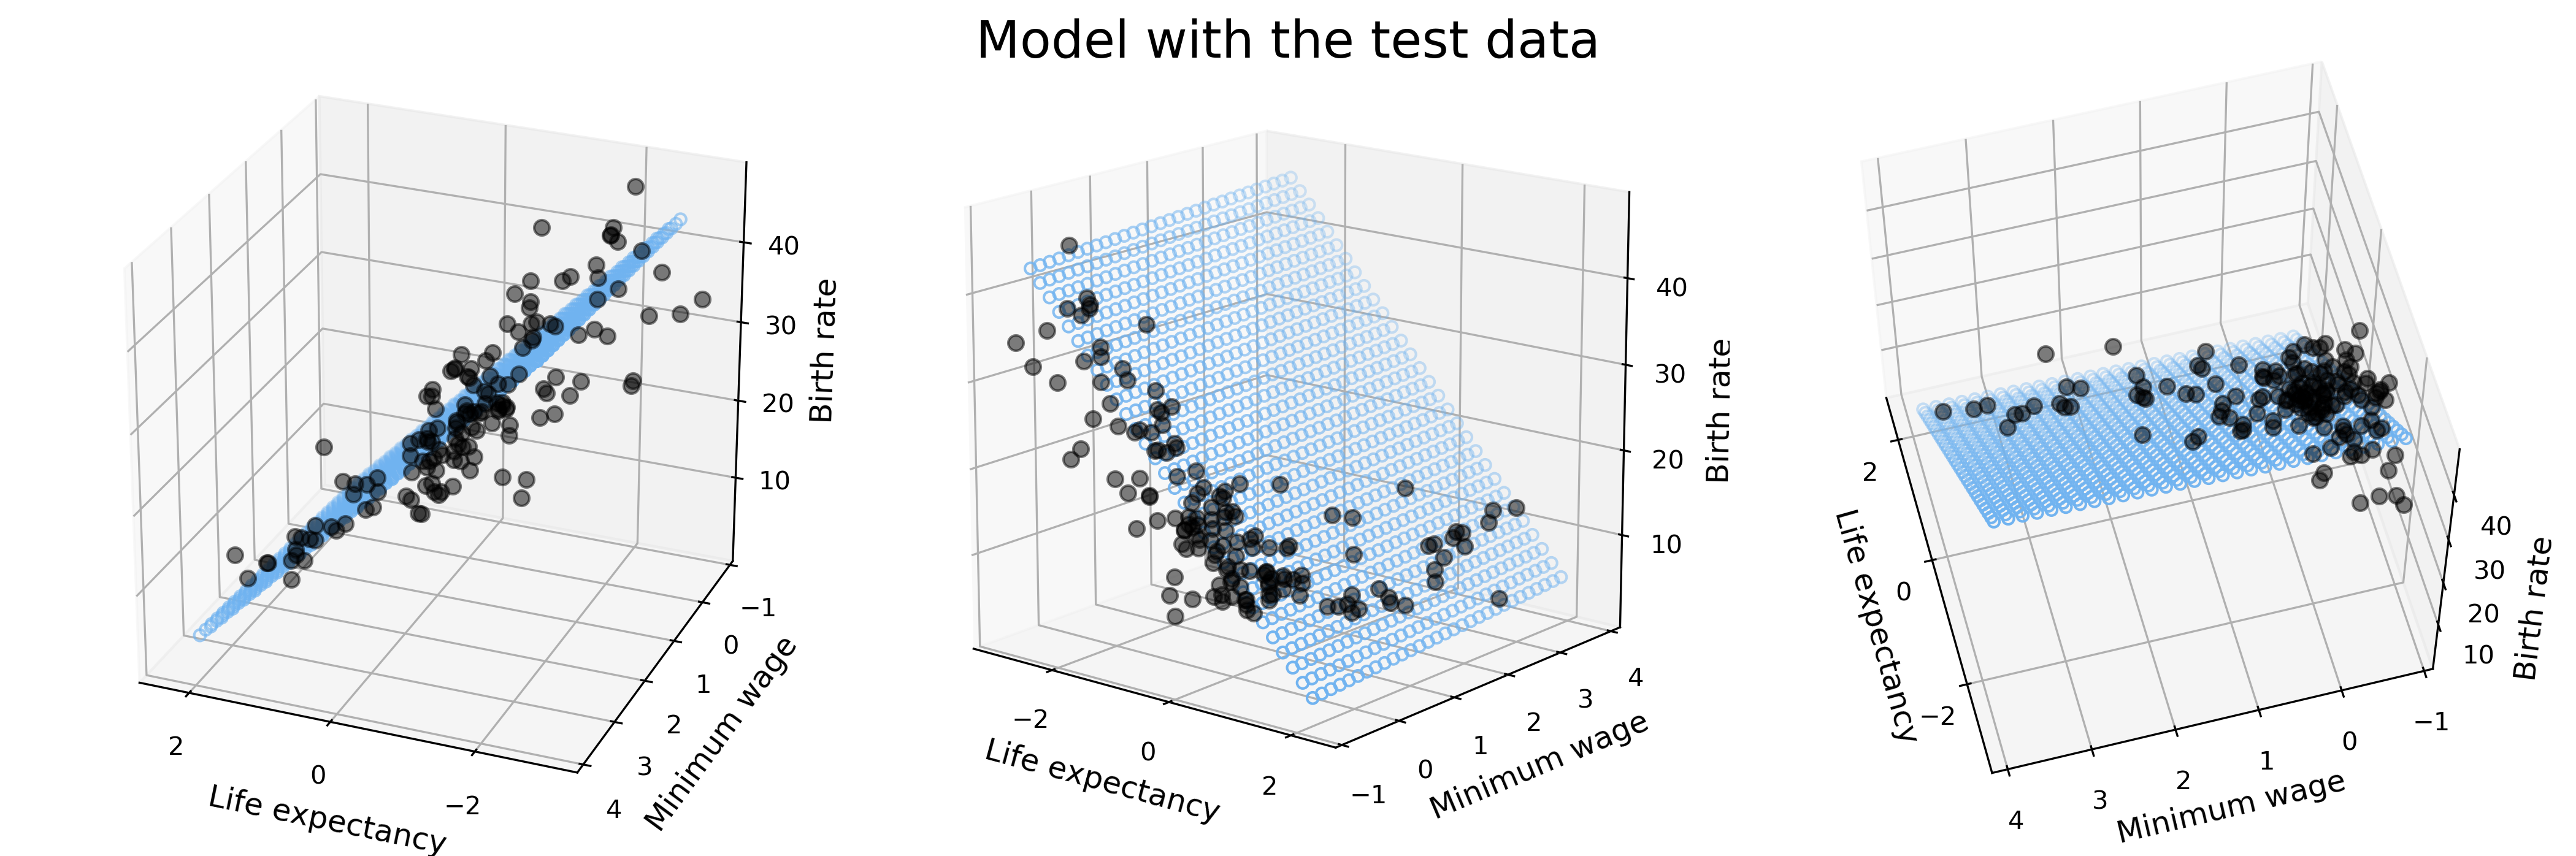

In [1163]:
############################## plotting model + test data ##############################

# Prepare model data point for visualization:

# train data for creating the model
x = x_train[:,0]
y = x_train[:,1]
z = y_train

x_pred = np.linspace(min(x), max(x), 30)  # range of life_expectancy values
y_pred = np.linspace(min(y), max(y), 30)  # range of minimum wage values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) # return a tuple of coordinate matrices from coordinate vectors
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = mlr.predict(model_viz)


# test data points
x2 = x_test[:,0]
y2 = x_test[:,1]
z2 = y_test


# plot :

plt.style.use('default')

fig = plt.figure(figsize=(14.1, 4.7), dpi=300)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x2, y2, z2, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5) # plot the data points
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0') # plot the hyperplane
    ax.set_xlabel('Life expectancy', fontsize=12)
    ax.set_ylabel('Minimum wage', fontsize=12)
    ax.set_zlabel('Birth rate', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Model with the test data', fontsize=20)

fig.tight_layout()

In [1164]:
# model evaluation

# taken from https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c

from sklearn import metrics

train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")

print('Train predictions error metrics:')
meanAbErr = metrics.mean_absolute_error(y_train, train_predictions)
meanSqErr = metrics.mean_squared_error(y_train, train_predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, train_predictions))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


print('\nTest predictions error metrics:')
meanAbErr = metrics.mean_absolute_error(y_test, test_predictions)
meanSqErr = metrics.mean_squared_error(y_test, test_predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, test_predictions))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


    train R2: 0.7461657809590678
    test R2: 0.5623209656627393

Train predictions error metrics:
Mean Absolute Error: 3.8775610122836572
Mean Square Error: 24.6655820042865
Root Mean Square Error: 4.966445610724686

Test predictions error metrics:
Mean Absolute Error: 4.700299325258205
Mean Square Error: 36.48439150107625
Root Mean Square Error: 6.040231080105815


<font size="4"><b>Birth rate vs. (Life expectancy AND Minimum wage) with interaction term</b></font>

$Y=\beta_0+\beta_1Z_1+\beta_2Z_2+\beta_3Z_1Z_2$

In [1165]:
# setting and formatting train and test data
elementwise_prod = np.multiply(life_exp_copy_for_multi_linreg_normalized,minimum_wage_arr_clean_normalized)
x_train = np.column_stack((life_exp_copy_for_multi_linreg_normalized, minimum_wage_arr_clean_normalized, elementwise_prod))
y_train = br_copy_for_minimum_wage_linreg

x_labels = ['Life expectancy', 'Minimum wage','Life expectancy * Minimum wage']
y_label = 'Birth rate'

elementwise_prod = np.multiply(life_exp_2024_arr_short_normalized,minimum_wage_2024_arr_clean_normalized)
x_test = np.column_stack((life_exp_2024_arr_short_normalized, minimum_wage_2024_arr_clean_normalized, elementwise_prod))
y_test = birth_rate_2024_arr_short

In [1166]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  18.46950647050639
Coefficients:


[('Life expectancy', -6.9524421120902415),
 ('Minimum wage', -3.583533181652008),
 ('Life expectancy * Minimum wage', 2.9731300599252046)]

In [1167]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)


print("Israel's life expectancy in 2023:",life_exp_copy_for_multi_linreg[65])
print("Israel's minimum wage in 2023:",minimum_wage_arr_clean[65])
print("Israel's birth rate prediction in 2023:",train_predictions[65])
print("Israel's birth rate ground truth data in 2023:",y_train[65])
print("**********")
print("Israel's life expectancy in 2024:",life_exp_2024_arr_short[11])
print("Israel's minimum wage in 2024:",minimum_wage_2024_arr_clean[11])
print("Israel's birth rate prediction in 2024:",test_predictions[11])
print("Israel's birth rate ground truth data in 2024:",y_test[11])

Israel's life expectancy in 2023: 82.8
Israel's minimum wage in 2023: 7.58
Israel's birth rate prediction in 2023: 9.73481450292699
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's life expectancy in 2024: 83.1
Israel's minimum wage in 2024: 9.48
Israel's birth rate prediction in 2024: 9.863970464132773
Israel's birth rate ground truth data in 2024: 19.1


Skipping visualization since this is a 4 dimensional model...

In [1168]:
# model evaluation

# taken from https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c

from sklearn import metrics

train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")

print('Train predictions error metrics:')
meanAbErr = metrics.mean_absolute_error(y_train, train_predictions)
meanSqErr = metrics.mean_squared_error(y_train, train_predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, train_predictions))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


print('\nTest predictions error metrics:')
meanAbErr = metrics.mean_absolute_error(y_test, test_predictions)
meanSqErr = metrics.mean_squared_error(y_test, test_predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, test_predictions))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


    train R2: 0.7631809862185407
    test R2: 0.5956387803003439

Train predictions error metrics:
Mean Absolute Error: 3.7580830459461354
Mean Square Error: 23.012180259505918
Root Mean Square Error: 4.797101235069562

Test predictions error metrics:
Mean Absolute Error: 4.435290039006937
Mean Square Error: 33.707059031771884
Root Mean Square Error: 5.805778072900469


<font size="6"><strong><em><a id="multi_reg_new_feature">Multilinear regression with a categorical variable: continents</a></em></strong></font>

Our continent data is represented as 6 binary parameters. For every country sample, there is a corresponding array of 6 bits. The bits from left to right, correspond to the continents: africa, asia, europe, north america, oceania, south america respectively.

<font size="4"><b>Loading the data</b></font>

In [1169]:
################loading train data#################

#africa
africa_df = pd.read_excel("Data.xlsx", usecols="K")
africa_matrix = africa_df.to_numpy()
africa_arr = np.squeeze(np.asarray(africa_matrix))

#asia
asia_df = pd.read_excel("Data.xlsx", usecols="L")
asia_matrix = asia_df.to_numpy()
asia_arr = np.squeeze(np.asarray(asia_matrix))

#europe
europe_df = pd.read_excel("Data.xlsx", usecols="M")
europe_matrix = europe_df.to_numpy()
europe_arr = np.squeeze(np.asarray(europe_matrix))

#north america
north_america_df = pd.read_excel("Data.xlsx", usecols="N")
north_america_matrix = north_america_df.to_numpy()
north_america_arr = np.squeeze(np.asarray(north_america_matrix))

#oceania
oceania_df = pd.read_excel("Data.xlsx", usecols="O")
oceania_matrix = oceania_df.to_numpy()
oceania_arr = np.squeeze(np.asarray(oceania_matrix))

#south america
south_america_df = pd.read_excel("Data.xlsx", usecols="P")
south_america_matrix = south_america_df.to_numpy()
south_america_arr = np.squeeze(np.asarray(south_america_matrix))

#continent
continent_df = pd.read_excel("Data.xlsx", usecols="J")
continent_matrix = continent_df.to_numpy()
continent_arr = np.squeeze(np.asarray(continent_matrix))



################loading test data#################

#africa
africa_2024_df = pd.read_excel("Data_2024.xlsx", usecols="F")
africa_2024_matrix = africa_2024_df.to_numpy()
africa_2024_arr = np.squeeze(np.asarray(africa_2024_matrix))

#asia
asia_2024_df = pd.read_excel("Data_2024.xlsx", usecols="G")
asia_2024_matrix = asia_2024_df.to_numpy()
asia_2024_arr = np.squeeze(np.asarray(asia_2024_matrix))

#europe
europe_2024_df = pd.read_excel("Data_2024.xlsx", usecols="H")
europe_2024_matrix = europe_2024_df.to_numpy()
europe_2024_arr = np.squeeze(np.asarray(europe_2024_matrix))

#north america
north_america_2024_df = pd.read_excel("Data_2024.xlsx", usecols="I")
north_america_2024_matrix = north_america_2024_df.to_numpy()
north_america_2024_arr = np.squeeze(np.asarray(north_america_2024_matrix))

#oceania
oceania_2024_df = pd.read_excel("Data_2024.xlsx", usecols="J")
oceania_2024_matrix = oceania_2024_df.to_numpy()
oceania_2024_arr = np.squeeze(np.asarray(oceania_2024_matrix))

#south america
south_america_2024_df = pd.read_excel("Data_2024.xlsx", usecols="K")
south_america_2024_matrix = south_america_2024_df.to_numpy()
south_america_2024_arr = np.squeeze(np.asarray(south_america_2024_matrix))

#continent
continent_2024_df = pd.read_excel("Data_2024.xlsx", usecols="E")
continent_2024_matrix = continent_2024_df.to_numpy()
continent_2024_arr = np.squeeze(np.asarray(continent_2024_matrix))

<font size="4"><b>Starting simple: taking 6 indicator variables which represent the continents</b></font>

$Y=\beta_0+\beta_1D_1+\beta_2D_2+...+\beta_6D_6$

In [1170]:
# setting and formatting train and test data
x_train = np.column_stack((africa_arr, asia_arr, europe_arr, north_america_arr, oceania_arr, south_america_arr))
y_train = birth_rate_arr

x_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
y_label = 'Birth rate'

x_test = np.column_stack((africa_2024_arr, asia_2024_arr, europe_2024_arr, north_america_2024_arr, oceania_2024_arr, south_america_2024_arr))
y_test = birth_rate_2024_arr

In [1171]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  19.40119211438052
Coefficients:


[('Africa', 12.355104181915765),
 ('Asia', -0.7666268969892025),
 ('Europe', -9.662328478016878),
 ('North America', -3.3829312448153024),
 ('Oceania', 3.483807885619476),
 ('South America', -2.027025447713857)]

In [1172]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)

def get_continent_name(arr,xlabels):
    for i in range(len(arr)):
        if arr[i]!=0:
            return xlabels[i]

print("Israel's continent:", get_continent_name(x_train[81],x_labels))
print("Israel's birth rate prediction in 2023:",train_predictions[81])
print("Israel's birth rate ground truth data in 2023:",y_train[81])
print("**********")
print("Israel's continent:",get_continent_name(x_test[15],x_labels))
print("Israel's birth rate prediction in 2024:",test_predictions[15])
print("Israel's birth rate ground truth data in 2024:",y_test[15])

Israel's continent: Asia
Israel's birth rate prediction in 2023: 18.63456521739132
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's continent: Asia
Israel's birth rate prediction in 2024: 18.63456521739132
Israel's birth rate ground truth data in 2024: 19.1


In [1173]:
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")


    train R2: 0.6804484593794305
    test R2: 0.54960649082193



<font size="4"><b>A bit more complicated: adding X as life expectancy parameter</b></font>

$Y=\beta_0+\beta_1D_1+...+\beta_6D_6+\beta_7X$

In [1174]:
# setting and formatting train and test data
x_train = np.column_stack((africa_arr, asia_arr, europe_arr, north_america_arr, oceania_arr, south_america_arr,life_exp_arr_clean))
y_train = birth_rate_arr

x_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America','Life Expectancy']
y_label = 'Birth rate'

x_test = np.column_stack((africa_2024_arr, asia_2024_arr, europe_2024_arr, north_america_2024_arr, oceania_2024_arr, south_america_2024_arr,life_exp_2024_arr))
y_test = birth_rate_2024_arr

In [1175]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  74.86427804424834
Coefficients:


[('Africa', 5.423409613293841),
 ('Asia', -0.0485253487676659),
 ('Europe', -4.585650134298679),
 ('North America', -1.7090185950945127),
 ('Oceania', 1.4095991966385744),
 ('South America', -0.4898147317714999),
 ('Life Expectancy', -0.7606801153800296)]

In [1176]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)


print("Israel's continent:", get_continent_name(x_train[81][:-1],x_labels[:-1]))
print("Israel's life expectancy in 2023:", x_train[81][6])
print("Israel's birth rate prediction in 2023:",train_predictions[81])
print("Israel's birth rate ground truth data in 2023:",y_train[81])
print("**********")
print("Israel's continent:",get_continent_name(x_test[15][:-1],x_labels[:-1]))
print("Israel's life expectancy in 2024:", x_test[15][6])
print("Israel's birth rate prediction in 2024:",test_predictions[15])
print("Israel's birth rate ground truth data in 2024:",y_test[15])

Israel's continent: Asia
Israel's life expectancy in 2023: 82.8
Israel's birth rate prediction in 2023: 11.831439142014226
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's continent: Asia
Israel's life expectancy in 2024: 83.1
Israel's birth rate prediction in 2024: 11.603235107400216
Israel's birth rate ground truth data in 2024: 19.1


In [1177]:
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")


    train R2: 0.8147376077331293
    test R2: 0.7522172471265762



<font size="4"><b>Significantly more complicated: adding X as life expectancy parameter with interaction terms</b></font>

$Y=\beta_0+\beta_1D_1+...+\beta_6D_6+\beta_7X+\beta_8D_1X+...+\beta_{14}D_6X$

In [1178]:
# setting and formatting train and test data
elementwise_prod_1 = np.multiply(africa_arr,life_exp_arr_clean)
elementwise_prod_2 = np.multiply(asia_arr,life_exp_arr_clean)
elementwise_prod_3 = np.multiply(europe_arr,life_exp_arr_clean)
elementwise_prod_4 = np.multiply(north_america_arr,life_exp_arr_clean)
elementwise_prod_5 = np.multiply(oceania_arr,life_exp_arr_clean)
elementwise_prod_6 = np.multiply(south_america_arr,life_exp_arr_clean)
x_train = np.column_stack((africa_arr, asia_arr, europe_arr, north_america_arr, oceania_arr, south_america_arr,life_exp_arr_clean,
                           elementwise_prod_1,elementwise_prod_2,elementwise_prod_3,elementwise_prod_4,elementwise_prod_5,elementwise_prod_6))
y_train = birth_rate_arr

x_labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America','Life Expectancy',
            'Africa*LE', 'Asia*LE', 'Europe*LE', 'North America*LE','Oceania*LE','South America*LE']
y_label = 'Birth rate'

elementwise_prod_1 = np.multiply(africa_2024_arr,life_exp_2024_arr)
elementwise_prod_2 = np.multiply(asia_2024_arr,life_exp_2024_arr)
elementwise_prod_3 = np.multiply(europe_2024_arr,life_exp_2024_arr)
elementwise_prod_4 = np.multiply(north_america_2024_arr,life_exp_2024_arr)
elementwise_prod_5 = np.multiply(oceania_2024_arr,life_exp_2024_arr)
elementwise_prod_6 = np.multiply(south_america_2024_arr,life_exp_2024_arr)
x_test = np.column_stack((africa_2024_arr, asia_2024_arr, europe_2024_arr, north_america_2024_arr, oceania_2024_arr, south_america_2024_arr,life_exp_2024_arr,
                          elementwise_prod_1,elementwise_prod_2,elementwise_prod_3,elementwise_prod_4,elementwise_prod_5,elementwise_prod_6))
y_test = birth_rate_2024_arr

In [1179]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  -1489008404.5099926
Coefficients:


[('Africa', 1489008492.5999298),
 ('Asia', 1489008500.3831291),
 ('Europe', 1489008422.0597613),
 ('North America', 1489008471.8424687),
 ('Oceania', 1489008467.8734076),
 ('South America', 1489008475.0030918),
 ('Life Expectancy', 738688974869.3336),
 ('Africa*LE', -738688974870.2164),
 ('Asia*LE', -738688974870.3787),
 ('Europe*LE', -738688974869.4315),
 ('North America*LE', -738688974870.0161),
 ('Oceania*LE', -738688974869.9097),
 ('South America*LE', -738688974870.0417)]

In [1180]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)


print("Israel's continent:", get_continent_name(x_train[81][:-1],x_labels[:-1]))
print("Israel's life expectancy in 2023:", x_train[81][6])
print("Israel's birth rate prediction in 2023:",train_predictions[81])
print("Israel's birth rate ground truth data in 2023:",y_train[81])
print("**********")
print("Israel's continent:",get_continent_name(x_test[15][:-1],x_labels[:-1]))
print("Israel's life expectancy in 2024:", x_test[15][6])
print("Israel's birth rate prediction in 2024:",test_predictions[15])
print("Israel's birth rate ground truth data in 2024:",y_test[15])

Israel's continent: Asia
Israel's life expectancy in 2023: 82.8
Israel's birth rate prediction in 2023: 9.341886520385742
Israel's birth rate ground truth data in 2023: 20.8
**********
Israel's continent: Asia
Israel's life expectancy in 2024: 83.1
Israel's birth rate prediction in 2024: 9.029386520385742
Israel's birth rate ground truth data in 2024: 19.1


In [1181]:
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")


    train R2: 0.8355369306552028
    test R2: 0.7827124981683095



<font size="6"><strong><em><a id="appendix">Appendix: <br> Multilinear regression with categorical variable of continents <br> attempt to calculate as a single categorical variable (fix needed)</a></em></strong></font>

<font size="4"><b>Starting simple: taking 1 categorical variable which represents the continents</b></font>

$Y=\beta_0+\beta_1D$

In [1182]:
# setting and formatting train and test data
x_train = continent_arr
x_train = np.reshape(x_train,(x_train.size,1))
y_train = birth_rate_arr

x_labels = ['Continent']
y_label = 'Birth rate'

x_test = continent_2024_arr
x_test = np.reshape(x_test,(x_test.size,1))
y_test = birth_rate_2024_arr

In [1183]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  28.29070587089865
Coefficients:


[('Continent', -3.051301236491092)]

In [1184]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)

In [1185]:
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")


    train R2: 0.21173619224571882
    test R2: 0.13895248765386703



<font size="4"><b>A bit more complicated: adding X as life expectancy parameter</b></font>

$Y=\beta_0+\beta_1D+\beta_2X$

In [1186]:
# setting and formatting train and test data
x_train = np.column_stack((continent_arr,life_exp_arr_clean))
y_train = birth_rate_arr

x_labels = ['Continent','Life Expectancy']
y_label = 'Birth rate'

x_test = np.column_stack((continent_2024_arr,life_exp_2024_arr))
y_test = birth_rate_2024_arr

In [1187]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  99.97495715128471
Coefficients:


[('Continent', -0.6507981935107674), ('Life Expectancy', -1.0795710168642552)]

In [1188]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)

In [1189]:
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")


    train R2: 0.7668397917946108
    test R2: 0.6909963065988891



<font size="4"><b>Significantly more complicated: adding X as life expectancy parameter with an interaction term</b></font>

$Y=\beta_0+\beta_1D+\beta_2X+\beta_3DX$

In [1190]:
# setting and formatting train and test data
elementwise_prod = np.multiply(continent_arr,life_exp_arr_clean)
x_train = np.column_stack((continent_arr,life_exp_arr_clean,elementwise_prod))
y_train = birth_rate_arr

x_labels = ['Continent','Life Expectancy','Continent*Life Expectancy']
y_label = 'Birth rate'

elementwise_prod= np.multiply(continent_2024_arr,life_exp_2024_arr)
x_test = np.column_stack((continent_2024_arr,life_exp_2024_arr,elementwise_prod))
y_test = birth_rate_2024_arr

In [1191]:
# model parameters
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.intercept_, mlr.coef_
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_labels, mlr.coef_))

Intercept:  113.16309316854617
Coefficients:


[('Continent', -7.1254759780777706),
 ('Life Expectancy', -1.2709738052448514),
 ('Continent*Life Expectancy', 0.09062588249057013)]

In [1192]:
# predictions
train_predictions = mlr.predict(x_train)
test_predictions = mlr.predict(x_test)

In [1193]:
train_r2 = r2_score(y_true=y_train,y_pred=train_predictions)
test_r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {test_r2}
""")


    train R2: 0.7727327548032572
    test R2: 0.7035483618362213

